# Data analysis tools exercise 3: Pearson Correlation

## Dataset: Bike sharing

I am using the bike sharing dataset of https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset, which provides data on how many bikes are rent out on specific hours of specific days, the weather on these days, whether the day was a weekday or not, etc. Temperature is indicated as a normalized value between 0 and 1, where one corresponds to 41 degrees Celcius; unfortunatly it is not clear what 0 corresponds to (the data is from Washington DC, I'm assuming temperatures below 0 occur there..). I will just show correlation to normalized temperature.

## Research question

Is there a relationship between the temperature on a specific day and the number of bikes rented out?


In [16]:
%matplotlib inline
import numpy
import pandas
import scipy.stats
import seaborn

data = pandas.read_csv('day.csv', low_memory=False)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


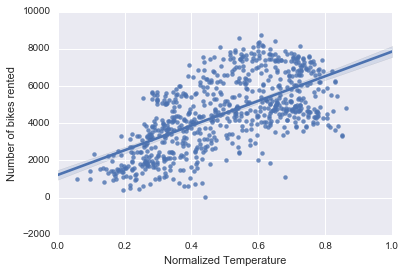

In [17]:
seaborn.regplot(x="temp", y="cnt", fit_reg=True, data=data)
plt.xlabel('Normalized Temperature')
plt.ylabel('Number of bikes rented');

In [18]:
print ('Association between normalized temperature and rented out bikes')
r,p = scipy.stats.pearsonr(data['temp'], data['cnt'])
print ("r = ",r,", p = ",p, ", r^2 = ",r*r)

Association between normalized temperature and rented out bikes
r =  0.627494009033 , p =  2.81062239759e-81 , r^2 =  0.393748731373


## Conclusion
The association between normalized temperature and rented out bikes is statistically significant (p is much smaller than 0.05). 39% of the variability in bikes rented is described by variation in temperature.